In [1]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
! pip install nltk

In [ ]:
df = pd.read_csv('/kaggle/input/dataset/_data.csv')
df

<h2>Data Collection using Web Scraping </h2>


In [96]:
first_class = []
second_class = []
ind=0
final_text=[]
def helper_functions(ind,urls):
    text=[]
    req = requests.get(urls)
    soup = BeautifulSoup(req.text,'html.parser')
    cl = soup.find_all('div',class_='td-post-content tagdiv-type')
    for div in cl:
        # Find all p tags within the div
        paragraphs = div.find_all('p')
        
        # Extract and print the text from each p tag
        for p in paragraphs:
            text.append(p.get_text(strip=True))
        final_text.append(text)


In [5]:
for i,item in enumerate(df['URL']):
    print("-",end="")
    helper_functions(i,item)

print(first_class)
print(len(first_class))

---------------------------------------------------------------------------------------------------------------------------------------------------[]

0


In [4]:
len(final_text)

0

In [21]:
final_text[0]

['Client:A leading insurance firm worldwide',
 'Industry Type:BFSI',
 'Products & Services:Insurance',
 'Organization Size:10000+',
 'The insurance industry, particularly in the context of providing coverage to Public Company Directors against Insider Trading public lawsuits, faces a significant challenge in accurately determining insurance premiums. Traditional methods of premium calculation may lack precision, and there is a growing need for more sophisticated and data-driven approaches. The integration of Artificial Intelligence (AI) and Machine Learning (ML) models in predicting insurance premiums for this specialized coverage is essential to enhance accuracy, fairness, and responsiveness in adapting to evolving risk factors.',
 'The problem at hand involves developing robust AI and ML models that can effectively analyze a multitude of dynamic variables influencing the risk profile of Public Company Directors. These variables include market conditions, regulatory changes, historica

In [22]:
result = ' '.join(final_text[0])
result

'Client:A leading insurance firm worldwide Industry Type:BFSI Products & Services:Insurance Organization Size:10000+ The insurance industry, particularly in the context of providing coverage to Public Company Directors against Insider Trading public lawsuits, faces a significant challenge in accurately determining insurance premiums. Traditional methods of premium calculation may lack precision, and there is a growing need for more sophisticated and data-driven approaches. The integration of Artificial Intelligence (AI) and Machine Learning (ML) models in predicting insurance premiums for this specialized coverage is essential to enhance accuracy, fairness, and responsiveness in adapting to evolving risk factors. The problem at hand involves developing robust AI and ML models that can effectively analyze a multitude of dynamic variables influencing the risk profile of Public Company Directors. These variables include market conditions, regulatory changes, historical legal precedents, f

In [23]:
result = []
for text in final_text:
    val = ' '.join(text)
    result.append(val)

In [24]:
len(result)

147

In [25]:
df['TEXT'] = result

In [5]:
df

,URL_ID,URL,TEXT,CLEAN_TEXT
0,bctech2011,https://insights.blackcoffer.com/ml-and-ai-bas...,Client:A leading insurance firm worldwide Indu...,Client A leading insurance firm worldwide Indu...
1,bctech2012,https://insights.blackcoffer.com/streamlined-i...,Client:A leading fintech firm in the USA Indus...,Client A leading fintech firm USA Industry Typ...
2,bctech2013,https://insights.blackcoffer.com/efficient-dat...,Client:A leading tech firm in the USA Industry...,Client A leading tech firm USA Industry Type I...
3,bctech2014,https://insights.blackcoffer.com/effective-man...,Client:A leading tech firm in the USA Industry...,Client A leading tech firm USA Industry Type I...
4,bctech2015,https://insights.blackcoffer.com/streamlined-t...,Client:A leading fintech firm in the USA Indus...,Client A leading fintech firm USA Industry Typ...
...,...,...,...,...
142,bctech2153,https://insights.blackcoffer.com/population-an...,Client:A leading marketing firm in the USA Ind...,Client A leading marketing firm USA Industry T...
143,bctech2154,https://insights.blackcoffer.com/google-lsa-ap...,Client:A leading marketing firm in the USA Ind...,Client A leading marketing firm USA Industry T...
144,bctech2155,https://insights.blackcoffer.com/healthcare-da...,Client:A leading healthcare tech firm in the U...,Client A leading healthcare tech firm USA Indu...
145,bctech2156,https://insights.blackcoffer.com/budget-sales-...,PresentationMapDashboardAPI Integration Kiba...,PresentationMapDashboardAPI Integration Kiba...


<h2> Text Preprocessing </h2>

In [ ]:
import re

In [ ]:
def preprocess_tweet_text(tweet):
    # Remove urls
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    # Remove user @ references and '#' from tweet
    tweet = re.sub('[^a-zA-Z]',' ', tweet)
    tweet.lower()
    tweet = [WordNetLemmatizer().lemmatize(word) for word in tweet.split(' ')]
    tweet = " ".join(tweet)
    # stopword removal
    tweet = [word for word in tweet.split(' ') if word not in set(stopwords.words('english'))]
    tweet=" ".join(tweet)
    # tweet = tweet.replace("\n","")
    
    return tweet

In [ ]:
df['CLEAN_TEXT'] = df['TEXT'].apply(preprocess_tweet_text)

In [ ]:
df['CLEAN_TEXT'][0]

'Client A leading insurance firm worldwide Industry Type BFSI Products   Services Insurance Organization Size        The insurance industry  particularly context providing coverage Public Company Directors Insider Trading public lawsuit  face significant challenge accurately determining insurance premium  Traditional method premium calculation may lack precision  growing need sophisticated data driven approach  The integration Artificial Intelligence  AI  Machine Learning  ML  model predicting insurance premium specialized coverage essential enhance accuracy  fairness  responsiveness adapting evolving risk factor  The problem hand involves developing robust AI ML model effectively analyze multitude dynamic variable influencing risk profile Public Company Directors  These variable include market condition  regulatory change  historical legal precedent  financial performance insured company  individual directorial behavior  The goal create predictive model accurately ass risk associated 

In [97]:
df1 = pd.read_csv('/kaggle/input/blackcoffer/blackc_final_data.csv')
df1

,URL_ID,URL,TEXT,CLEAN_TEXT
0,bctech2011,https://insights.blackcoffer.com/ml-and-ai-bas...,Client:A leading insurance firm worldwide Indu...,Client A leading insurance firm worldwide Indu...
1,bctech2012,https://insights.blackcoffer.com/streamlined-i...,Client:A leading fintech firm in the USA Indus...,Client A leading fintech firm USA Industry Typ...
2,bctech2013,https://insights.blackcoffer.com/efficient-dat...,Client:A leading tech firm in the USA Industry...,Client A leading tech firm USA Industry Type I...
3,bctech2014,https://insights.blackcoffer.com/effective-man...,Client:A leading tech firm in the USA Industry...,Client A leading tech firm USA Industry Type I...
4,bctech2015,https://insights.blackcoffer.com/streamlined-t...,Client:A leading fintech firm in the USA Indus...,Client A leading fintech firm USA Industry Typ...
...,...,...,...,...
142,bctech2153,https://insights.blackcoffer.com/population-an...,Client:A leading marketing firm in the USA Ind...,Client A leading marketing firm USA Industry T...
143,bctech2154,https://insights.blackcoffer.com/google-lsa-ap...,Client:A leading marketing firm in the USA Ind...,Client A leading marketing firm USA Industry T...
144,bctech2155,https://insights.blackcoffer.com/healthcare-da...,Client:A leading healthcare tech firm in the U...,Client A leading healthcare tech firm USA Indu...
145,bctech2156,https://insights.blackcoffer.com/budget-sales-...,PresentationMapDashboardAPI Integration Kiba...,PresentationMapDashboardAPI Integration Kiba...


In [98]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


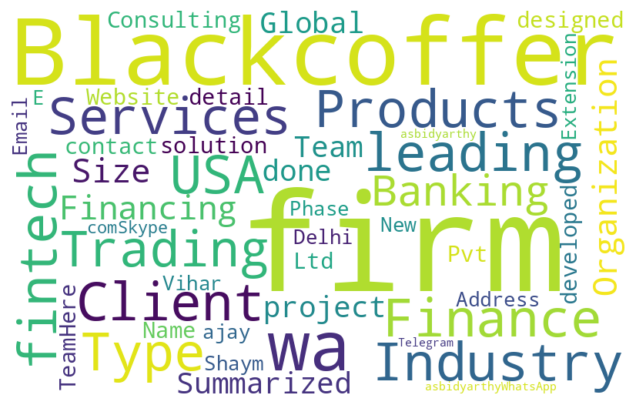

In [99]:
# Sample text
text = df1['CLEAN_TEXT'][1]

# Generate the word cloud
wordcloud = WordCloud(width=800, height=500, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [12]:
df1['CLEAN_TEXT'][0]

'Client A leading insurance firm worldwide Industry Type BFSI Products   Services Insurance Organization Size        The insurance industry  particularly context providing coverage Public Company Directors Insider Trading public lawsuit  face significant challenge accurately determining insurance premium  Traditional method premium calculation may lack precision  growing need sophisticated data driven approach  The integration Artificial Intelligence  AI  Machine Learning  ML  model predicting insurance premium specialized coverage essential enhance accuracy  fairness  responsiveness adapting evolving risk factor  The problem hand involves developing robust AI ML model effectively analyze multitude dynamic variable influencing risk profile Public Company Directors  These variable include market condition  regulatory change  historical legal precedent  financial performance insured company  individual directorial behavior  The goal create predictive model accurately ass risk associated 

<h2> Data Analysis </h2> 

In [13]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import cmudict
from textblob import TextBlob
import re

# Download required NLTK data files
nltk.download('punkt')
nltk.download('cmudict')

# Load spaCy model for POS tagging and dependency parsing
# nlp = spacy.load("en_core_web_sm")


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package cmudict to /usr/share/nltk_data...
[nltk_data]   Package cmudict is already up-to-date!


True

In [26]:
!pip install spacy

In [28]:
import spacy 
nlp = spacy.load("en_core_web_sm")

In [14]:
def get_sentiment_scores(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity


In [15]:
import nltk
nltk.download('opinion_lexicon')

[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


True

In [16]:
positive_words = set(nltk.corpus.opinion_lexicon.words('positive'))
negative_words = set(nltk.corpus.opinion_lexicon.words('negative'))

def get_pos_neg_scores(text):
    tokens = word_tokenize(text.lower())
    pos_score = sum(1 for word in tokens if word in positive_words) / len(tokens)
    neg_score = sum(1 for word in tokens if word in negative_words) / len(tokens)
    return pos_score, neg_score

OSError: No such file or directory: '/usr/share/nltk_data/corpora/opinion_lexicon/positive'

In [17]:
def get_avg_sentence_length(text):
    sentences = sent_tokenize(text)
    avg_sentence_length = sum(len(word_tokenize(sent)) for sent in sentences) / len(sentences)
    return avg_sentence_length


In [18]:
d = cmudict.dict()

def syllable_count(word):
    return len(word)

def is_complex_word(word):
    return syllable_count(word) >= 3

def get_complex_word_metrics(text):
    tokens = word_tokenize(text.lower())
    complex_word_count = sum(1 for word in tokens if is_complex_word(word))
    percentage_complex_words = complex_word_count / len(tokens)
    return percentage_complex_words, complex_word_count


In [19]:
def get_fog_index(text):
    avg_sentence_length = get_avg_sentence_length(text)
    percentage_complex_words, _ = get_complex_word_metrics(text)
    fog_index = 0.4 * (avg_sentence_length + percentage_complex_words * 100)
    return fog_index


In [20]:
def get_word_count(text):
    tokens = word_tokenize(text)
    word_count = len(tokens)
    avg_word_length = sum(len(word) for word in tokens) / word_count
    return word_count, avg_word_length


In [21]:
def get_syllables_per_word(text):
    tokens = word_tokenize(text.lower())
    syllable_count_total = sum(syllable_count(word) for word in tokens if word in d)
    return syllable_count_total / len(tokens)


In [31]:
def get_personal_pronouns(text):
    doc = nlp(text)
    personal_pronouns = [token.text for token in doc if token.pos_ == 'PRON' and token.dep_ in ('nsubj', 'nsubjpass')]
    return len(personal_pronouns)


In [36]:
def analyze_text(text):
    polarity, subjectivity = get_sentiment_scores(text)
    # pos_score, neg_score = get_pos_neg_scores(text)
    avg_sentence_length = get_avg_sentence_length(text)
    percentage_complex_words, complex_word_count = get_complex_word_metrics(text)
    fog_index = get_fog_index(text)
    avg_words_per_sentence = avg_sentence_length
    word_count, avg_word_length = get_word_count(text)
    syllables_per_word = get_syllables_per_word(text)
    personal_pronouns_count = get_personal_pronouns(text)
    
    return {
        # 'Positive Score': pos_score,
        # 'Negative Score': neg_score,
        'POLARITY SCORE': polarity,
        'SUBJECTIVITY SCORE': subjectivity,
        'AVG SENTENCE LENGTH': avg_sentence_length,
        'PERCENTAGE OF COMPLEX WORDS': percentage_complex_words,
        'FOG INDEX': fog_index,
        'AVG NUMBER OF WORDS PER SENTENCE': avg_words_per_sentence,
        'COMPLEX WORD COUNT': complex_word_count,
        'WORD COUNT': word_count,
        'SYLLABLE PER WORD': syllables_per_word,
        'PERSONAL PRONOUNS': personal_pronouns_count,
        'AVG WORD LENGTH': avg_word_length
    }


In [37]:
res = [df1['CLEAN_TEXT'].apply(analyze_text)]

In [128]:
res[0][5]

{'POLARITY SCORE': -0.08051948051948052,
 'SUBJECTIVITY SCORE': 0.33636363636363636,
 'AVG SENTENCE LENGTH': 57.0,
 'PERCENTAGE OF COMPLEX WORDS': 0.8771929824561403,
 'FOG INDEX': 57.887719298245614,
 'AVG NUMBER OF WORDS PER SENTENCE': 57.0,
 'COMPLEX WORD COUNT': 50,
 'WORD COUNT': 57,
 'SYLLABLE PER WORD': 4.473684210526316,
 'PERSONAL PRONOUNS': 0,
 'AVG WORD LENGTH': 6.280701754385965}

In [113]:
type(res[0][0]['POLARITY SCORE'])

float

<h2> Preparing the Output DataSet </h2>

In [124]:
output_df = pd.read_csv('/kaggle/input/output1/out.csv')
output_df

,URL_ID,URL,POSITIVE SCORE,NEGATIVE SCORE,POLARITY SCORE,SUBJECTIVITY SCORE,AVG SENTENCE LENGTH,PERCENTAGE OF COMPLEX WORDS,FOG INDEX,AVG NUMBER OF WORDS PER SENTENCE,COMPLEX WORD COUNT,WORD COUNT,SYLLABLE PER WORD,PERSONAL PRONOUNS,AVG WORD LENGTH
0,bctech2011,https://insights.blackcoffer.com/ml-and-ai-bas...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,bctech2012,https://insights.blackcoffer.com/streamlined-i...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,bctech2013,https://insights.blackcoffer.com/efficient-dat...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,bctech2014,https://insights.blackcoffer.com/effective-man...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,bctech2015,https://insights.blackcoffer.com/streamlined-t...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,bctech2153,https://insights.blackcoffer.com/population-an...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143,bctech2154,https://insights.blackcoffer.com/google-lsa-ap...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144,bctech2155,https://insights.blackcoffer.com/healthcare-da...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145,bctech2156,https://insights.blackcoffer.com/budget-sales-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [125]:
i=0
for index, row in output_df.iterrows():
    val=res[0][i]['POLARITY SCORE']
    output_df.at[index,'POLARITY SCORE']=val
    val=res[0][i]['SUBJECTIVITY SCORE']
    output_df.at[index,'SUBJECTIVITY SCORE']=val
    val=res[0][i]['AVG SENTENCE LENGTH']
    output_df.at[index,'AVG SENTENCE LENGTH']=val
    val=res[0][i]['PERCENTAGE OF COMPLEX WORDS']*100
    output_df.at[index,'PERCENTAGE OF COMPLEX WORDS']=val
    val=res[0][i]['FOG INDEX']
    output_df.at[index,'FOG INDEX']=val
    val=res[0][i]['AVG NUMBER OF WORDS PER SENTENCE']
    output_df.at[index,'AVG NUMBER OF WORDS PER SENTENCE']=val
    val=res[0][i]['COMPLEX WORD COUNT']
    output_df.at[index,'COMPLEX WORD COUNT']=val
    val=res[0][i]['WORD COUNT']
    output_df.at[index,'WORD COUNT']=val
    val=res[0][i]['SYLLABLE PER WORD']
    output_df.at[index,'SYLLABLE PER WORD']=val
    val=res[0][i]['PERSONAL PRONOUNS']
    output_df.at[index,'PERSONAL PRONOUNS']=val
    val=res[0][i]['AVG WORD LENGTH']
    output_df.at[index,'AVG WORD LENGTH']=val
    i=i+1
    
    

In [126]:
output_df.head(15)

,URL_ID,URL,POSITIVE SCORE,NEGATIVE SCORE,POLARITY SCORE,SUBJECTIVITY SCORE,AVG SENTENCE LENGTH,PERCENTAGE OF COMPLEX WORDS,FOG INDEX,AVG NUMBER OF WORDS PER SENTENCE,COMPLEX WORD COUNT,WORD COUNT,SYLLABLE PER WORD,PERSONAL PRONOUNS,AVG WORD LENGTH
0,bctech2011,https://insights.blackcoffer.com/ml-and-ai-bas...,NaN,NaN,0.055920,0.364177,514.0,94.163424,243.265370,514.0,484.0,514.0,6.774319,0.0,7.095331
1,bctech2012,https://insights.blackcoffer.com/streamlined-i...,NaN,NaN,-0.080519,0.336364,58.0,91.379310,59.751724,58.0,53.0,58.0,4.500000,0.0,6.396552
2,bctech2013,https://insights.blackcoffer.com/efficient-dat...,NaN,NaN,-0.080519,0.336364,57.0,87.719298,57.887719,57.0,50.0,57.0,4.368421,0.0,6.175439
3,bctech2014,https://insights.blackcoffer.com/effective-man...,NaN,NaN,-0.080519,0.336364,58.0,89.655172,59.062069,58.0,52.0,58.0,4.517241,0.0,6.293103
4,bctech2015,https://insights.blackcoffer.com/streamlined-t...,NaN,,-0.080519,0.336364,58.0,91.379310,59.751724,58.0,53.0,58.0,4.551724,0.0,6.448276
5,bctech2016,https://insights.blackcoffer.com/efficient-aws...,NaN,NaN,-0.080519,0.336364,57.0,87.719298,57.887719,57.0,50.0,57.0,4.473684,0.0,6.280702
6,bctech2017,https://insights.blackcoffer.com/streamlined-e...,NaN,NaN,0.003636,0.325455,61.0,91.803279,61.121311,61.0,56.0,61.0,4.622951,0.0,6.311475
7,bctech2018,https://insights.blackcoffer.com/automated-ort...,NaN,NaN,-0.070455,0.294318,59.0,91.525424,60.210169,59.0,54.0,59.0,4.677966,0.0,6.423729
8,bctech2019,https://insights.blackcoffer.com/streamlining-...,NaN,NaN,-0.080519,0.336364,64.0,92.187500,62.475000,64.0,59.0,64.0,4.687500,0.0,6.437500
9,bctech2020,https://insights.blackcoffer.com/efficient-dat...,NaN,NaN,-0.080519,0.336364,59.0,86.440678,58.176271,59.0,51.0,59.0,4.542373,0.0,6.288136


In [112]:
output_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   URL_ID                            147 non-null    object
 1   URL                               147 non-null    object
 2   POSITIVE SCORE                    1 non-null      object
 3   NEGATIVE SCORE                    1 non-null      object
 4   POLARITY SCORE                    147 non-null    object
 5   SUBJECTIVITY SCORE                147 non-null    object
 6   AVG SENTENCE LENGTH               147 non-null    object
 7   PERCENTAGE OF COMPLEX WORDS       147 non-null    object
 8   FOG INDEX                         147 non-null    object
 9   AVG NUMBER OF WORDS PER SENTENCE  147 non-null    object
 10  COMPLEX WORD COUNT                147 non-null    object
 11  WORD COUNT                        147 non-null    object
 12  SYLLABLE PER WORD     

In [93]:
output_df.to_csv('output_dataframe.csv', index=False)

In [94]:
# For downloading the output datasset on the system
from IPython.display import FileLink
FileLink('output_dataframe.csv')

/kaggle/working/output_dataframe.csv

<h2> Plottings for Output Dataset Analysis </h2>

In [101]:
import seaborn as sns

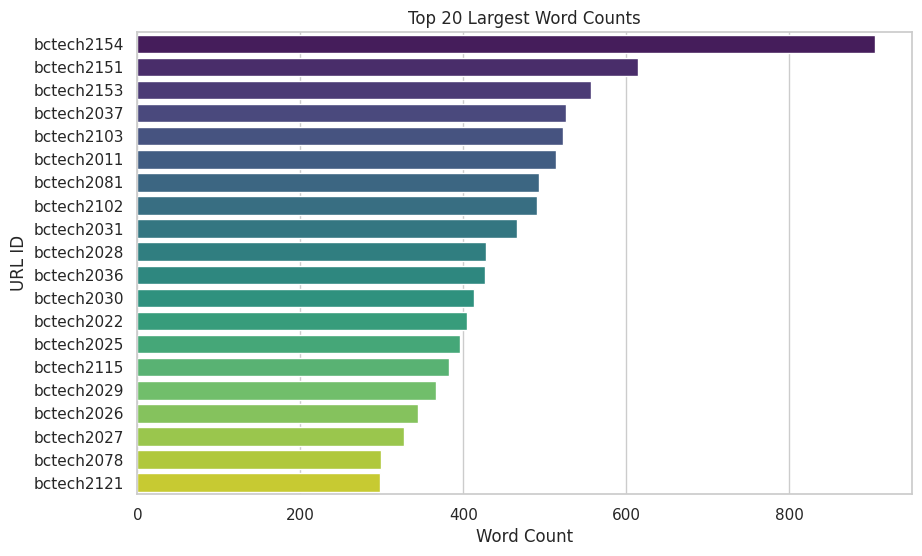

In [130]:
top_n = 20

# Plot 1: Top N Largest Values in Word Count
df_word_count_top = output_df.nlargest(top_n, 'WORD COUNT')
plt.figure(figsize=(10, 6))
sns.barplot(x='WORD COUNT', y='URL_ID', data=df_word_count_top, palette='viridis')
plt.title(f'Top {top_n} Largest Word Counts')
plt.xlabel('Word Count')
plt.ylabel('URL ID')
plt.show()


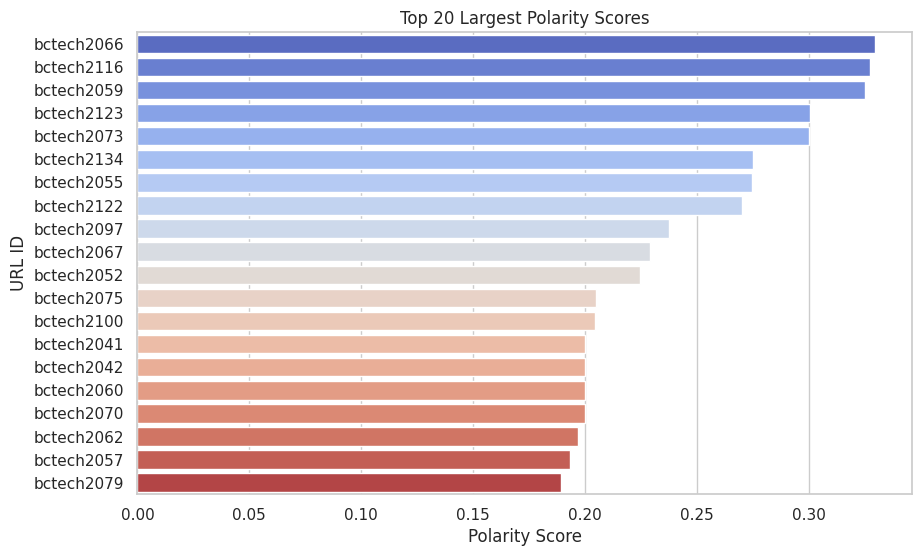

In [132]:
df_polarity_top = output_df.nlargest(top_n, 'POLARITY SCORE')
plt.figure(figsize=(10, 6))
sns.barplot(x='POLARITY SCORE', y='URL_ID', data=df_polarity_top, palette='coolwarm')
plt.title(f'Top {top_n} Largest Polarity Scores')
plt.xlabel('Polarity Score')
plt.ylabel('URL ID')
plt.show()

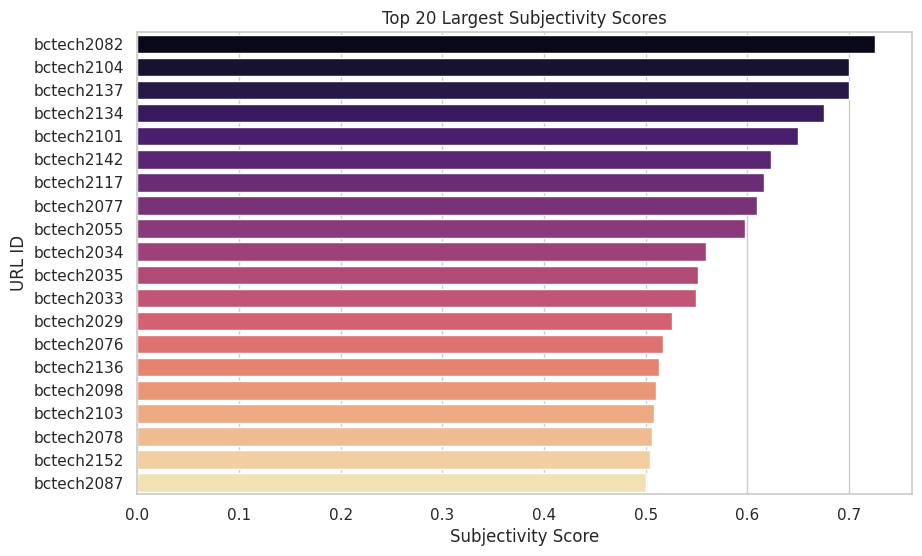

In [133]:
df_subjectivity_top = output_df.nlargest(top_n, 'SUBJECTIVITY SCORE')
plt.figure(figsize=(10, 6))
sns.barplot(x='SUBJECTIVITY SCORE', y='URL_ID', data=df_subjectivity_top, palette='magma')
plt.title(f'Top {top_n} Largest Subjectivity Scores')
plt.xlabel('Subjectivity Score')
plt.ylabel('URL ID')
plt.show()

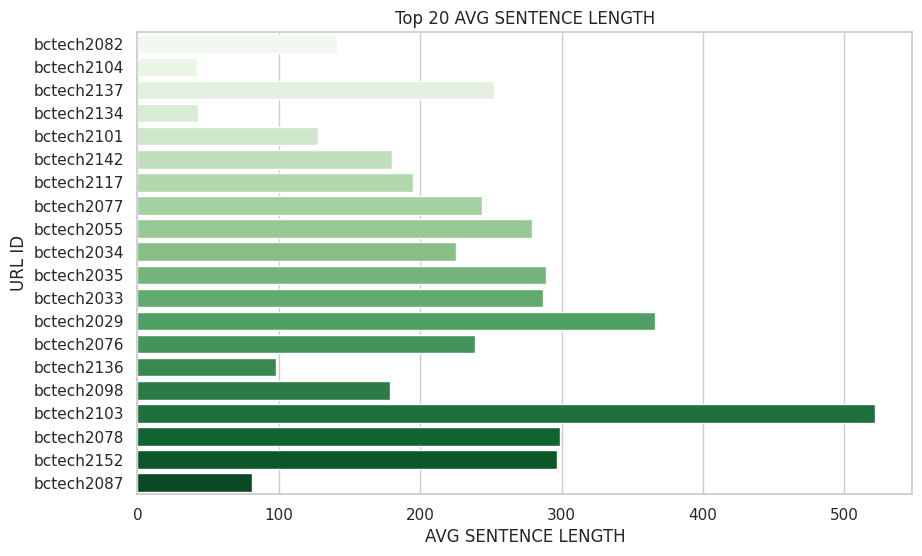

In [135]:
df_avg_sentence_length_top = output_df.nlargest(top_n, 'AVG SENTENCE LENGTH')
plt.figure(figsize=(10, 6))
sns.barplot(x='AVG SENTENCE LENGTH', y='URL_ID', data=df_subjectivity_top, palette='Greens')
plt.title(f'Top {top_n} AVG SENTENCE LENGTH')
plt.xlabel('AVG SENTENCE LENGTH')
plt.ylabel('URL ID')
plt.show()

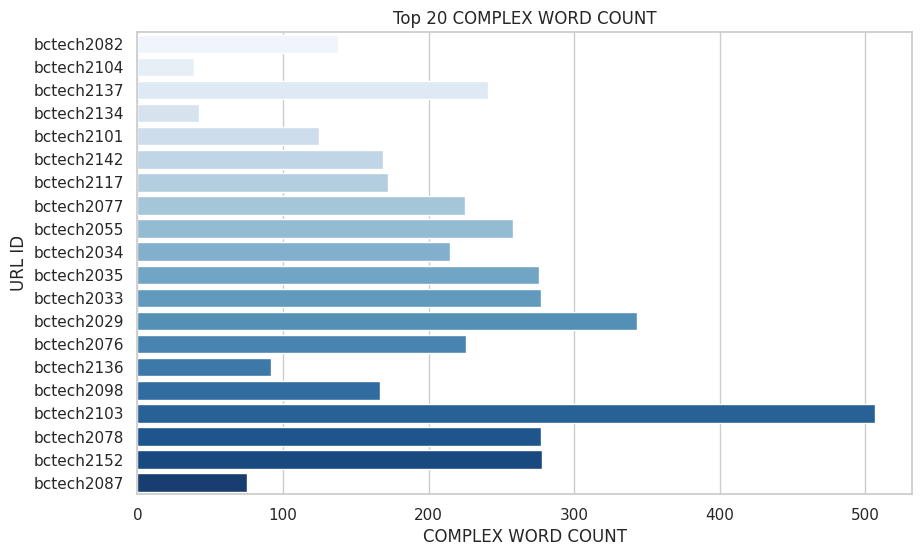

In [137]:
df_complex_word_count_top = output_df.nlargest(top_n, 'COMPLEX WORD COUNT')
plt.figure(figsize=(10, 6))
sns.barplot(x='COMPLEX WORD COUNT', y='URL_ID', data=df_subjectivity_top, palette='Blues')
plt.title(f'Top {top_n} COMPLEX WORD COUNT')
plt.xlabel('COMPLEX WORD COUNT')
plt.ylabel('URL ID')
plt.show()

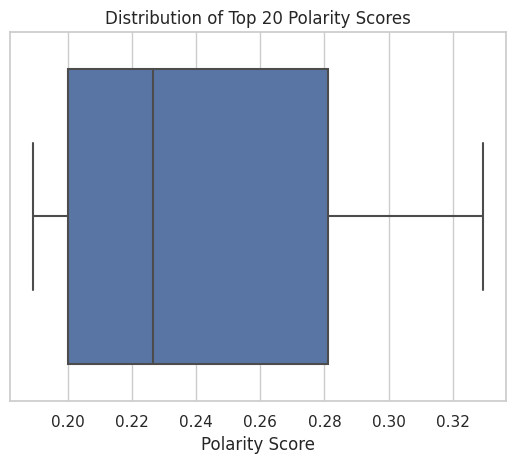

In [138]:
sns.boxplot(x='POLARITY SCORE', data=df_polarity_top)
plt.title(f'Distribution of Top {top_n} Polarity Scores')
plt.xlabel('Polarity Score')
plt.show()


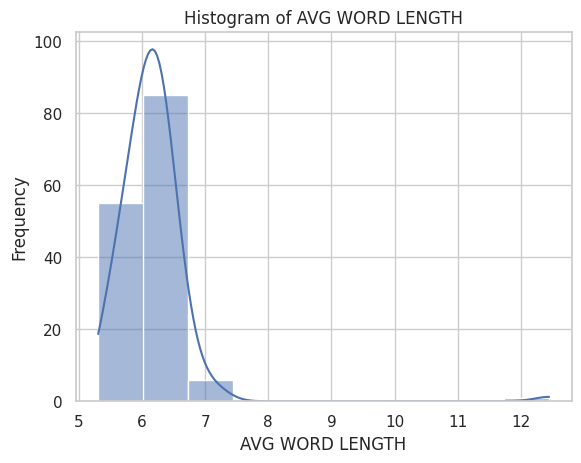

In [141]:
sns.histplot(output_df['AVG WORD LENGTH'], bins=10, kde=True)
plt.title('Histogram of AVG WORD LENGTH')
plt.xlabel('AVG WORD LENGTH')
plt.ylabel('Frequency')
plt.show()